In [1]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *

## Image Classification

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('images'),Path('annotations')]

In [4]:
(path/"images").ls()

(#7393) [Path('images/Sphynx_91.jpg'),Path('images/miniature_pinscher_143.jpg'),Path('images/Egyptian_Mau_71.jpg'),Path('images/Maine_Coon_129.jpg'),Path('images/staffordshire_bull_terrier_83.jpg'),Path('images/scottish_terrier_173.jpg'),Path('images/samoyed_84.jpg'),Path('images/scottish_terrier_124.jpg'),Path('images/american_bulldog_141.jpg'),Path('images/Abyssinian_24.jpg')...]

In [5]:
fname = (path/"images").ls()[0]
fname

Path('images/Sphynx_91.jpg')

In [6]:
re.findall(r'([\w_]+)_\d+.jpg$', fname.name)

['Sphynx']

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'([\w_]+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")



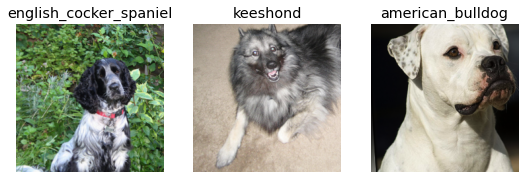

In [8]:
dls.show_batch(nrows=1, ncols=3)

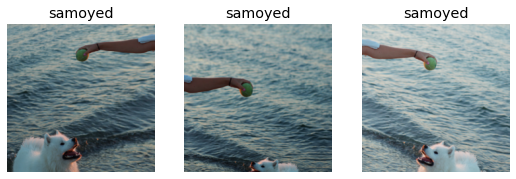

In [9]:
dls.show_batch(nrows=1, ncols=3, unique=True)

In [10]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jupyter/.fastai/data/oxford-iiit-pet/images/samoyed_91.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jupyter/.fastai/data/oxford-iiit-pet/images/samoyed_91.jpg
    applying partial gives
      samoyed
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(31)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(31))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up aft

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jupyter/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.657853,0.348307,0.107578,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.572013,0.318949,0.105548,00:40
1,0.385273,0.250394,0.081191,00:40


In [21]:
cl = ClassificationInterpretation.from_learner(learn)


In [22]:
cl.confusion_matrix()

array([[35,  1,  0, ...,  0,  0,  0],
       [ 3, 36,  0, ...,  0,  0,  0],
       [ 0,  0, 34, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ...,  0, 39,  0],
       [ 0,  0,  0, ...,  0,  0, 40]])

In [12]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

## Cross Entropy Loss

In [18]:
x,y = dls.one_batch()

In [29]:
y.size()
# Here y is the dependent variable, i.e the number associated with the breed type (36 in total) with 64 rows"

torch.Size([64])

In [28]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [31]:
# here we pass one batch iteration (64 rows) to get the prediction (aka, the activations of the final layer of the nn) if we just wanted to run it on one batch
preds,_ = learn.get_preds(dl=[(x,y)])
## the _ here is the target, which we don't need because y already represents the targets
preds[0]

TensorBase([6.2402e-05, 8.1049e-06, 9.3524e-05, 9.8081e-01, 1.3521e-03, 1.0602e-04, 1.8825e-03, 1.1276e-04, 1.1840e-05, 1.2631e-02, 2.1592e-03, 8.2736e-05, 1.2089e-06, 3.0821e-06, 2.5692e-06, 7.4668e-07,
        7.7141e-07, 7.5187e-07, 1.3694e-06, 2.4724e-06, 2.1504e-05, 4.5249e-06, 7.0896e-06, 1.3260e-05, 1.2286e-04, 3.8007e-06, 4.7377e-06, 3.4934e-04, 2.0495e-05, 8.4965e-07, 2.1743e-06, 3.8434e-05,
        8.3772e-06, 2.1097e-06, 3.0869e-06, 2.5771e-06, 6.6746e-05])

In [32]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

In [33]:
y[0]

TensorCategory(3, device='cuda:0')

In [37]:
dls.vocab[3]

'Bombay'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

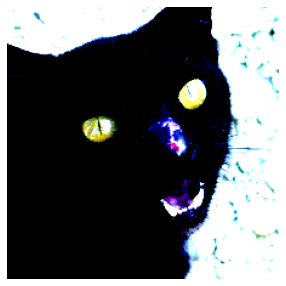

In [49]:
show_image(x[0])

The preds[0] here shows the prediction for the 0th row, with 37 predictions with probabilities for each category. We notice here that the value 3 (0th index) has the highest value, which means it has predicted that the category index 3 is what the image is. (which referes to Bombay cat)


### Softmax

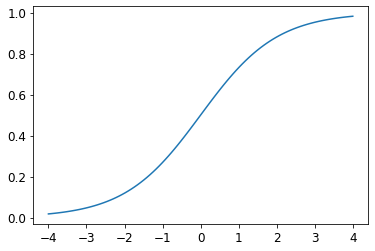

In [51]:
from utils import plot_function
plot_function(torch.sigmoid, min=-4, max=4)

In [59]:
# Imagine we have 6 images and 2 categories and we generate activations for them (one for each category)
acts = torch.randn((6,3)) * 2 # The multiplication by 2 is to have a std diviation of 2
acts

tensor([[ 0.7117, -1.3732,  3.1472],
        [-1.6909,  2.6246,  1.3743],
        [-2.1784, -0.7106, -1.8276],
        [-1.3163,  0.0998,  4.5334],
        [ 2.3579, -0.8689, -2.7727],
        [-2.5724, -2.8065,  0.0720]])

In [60]:
# Since the values are not between 0-1 we need sigmoid
acts.sigmoid()

tensor([[0.6708, 0.2021, 0.9588],
        [0.1557, 0.9324, 0.7981],
        [0.1017, 0.3295, 0.1385],
        [0.2114, 0.5249, 0.9894],
        [0.9136, 0.2955, 0.0588],
        [0.0709, 0.0570, 0.5180]])

In [62]:
# But the values here do not add up to 1, so we can't read whats the category with highest prediction, so we do a relative difference in probability,
# we subtract the sigmoid activation of 3 by 7, i.e How likely is this to be a 3 vs 7 
(acts[:,0]  - acts[:,1] - acts[:,2]).sigmoid()

tensor([0.2569, 0.0034, 0.5890, 0.0026, 0.9975, 0.5404])

In [65]:
# This is what softmax does.
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0797, 0.0099, 0.9104],
        [0.0103, 0.7694, 0.2204],
        [0.1479, 0.6420, 0.2101],
        [0.0028, 0.0117, 0.9855],
        [0.9564, 0.0380, 0.0057],
        [0.0630, 0.0499, 0.8871]])